🔧 Gear Train Calculator & Visualizer with Backlash 🔧


How many gears?  3
Enter number of teeth for gear 1:  40
Enter number of teeth for gear 2:  60
Enter number of teeth for gear 3:  80
Enter input speed (RPM):  90
Enter input torque (Nm):  45
Enter input rotation direction (CW/CCW):  ccw
Enter backlash per gear mesh (as %):  2



📊 Final Output:
Output Speed: 46.86 RPM
Output Torque: 86.44 Nm
Output Direction: CCW
Applied Backlash per Stage: 2.0%


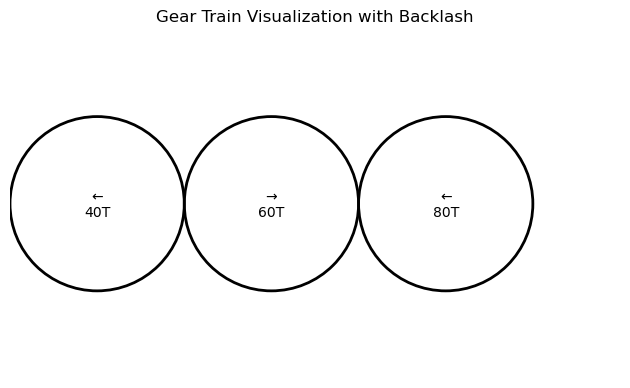

In [9]:
import matplotlib.pyplot as plt

# ------------------------------
# Gear class: Represents a single gear
# ------------------------------
class Gear:
    def __init__(self, teeth, is_driver=False):
        self.teeth = teeth
        self.is_driver = is_driver


# ------------------------------
# GearPair class: Represents two meshed gears with backlash
# ------------------------------
class GearPair:
    def __init__(self, driver, driven, backlash=0.0):
        self.driver = driver
        self.driven = driven
        self.ratio = driven.teeth / driver.teeth
        self.backlash = backlash  # e.g., 0.02 for 2%

    def speed_out(self, speed_in):
        effective_ratio = self.ratio * (1 - self.backlash)
        return speed_in / effective_ratio

    def direction_out(self, dir_in):
        return not dir_in


# ------------------------------
# Compute full gear train output
# ------------------------------
def compute_gear_train(gears, input_speed, input_torque, input_dir, backlash=0.0):
    speed = input_speed
    torque = input_torque
    direction = input_dir

    for i in range(len(gears) - 1):
        pair = GearPair(gears[i], gears[i + 1], backlash=backlash)
        speed = pair.speed_out(speed)
        torque *= pair.ratio * (1 - backlash)
        direction = pair.direction_out(direction)

    return speed, torque, direction


# ------------------------------
# Plot the gear train
# ------------------------------
def plot_gears(gears, directions):
    fig, ax = plt.subplots()

    for i, gear in enumerate(gears):
        x_pos = i * 2
        circle = plt.Circle((x_pos, 0), 1, fill=False, linewidth=2)
        ax.add_artist(circle)

        arrow = '→' if directions[i] else '←'
        ax.text(x_pos, 0, f"{arrow}\n{gear.teeth}T", ha='center', va='center', fontsize=10)

    ax.set_aspect('equal')
    plt.xlim(-1, len(gears) * 2)
    plt.ylim(-2, 2)
    plt.title("Gear Train Visualization with Backlash")
    plt.axis('off')
    plt.tight_layout()
    plt.savefig("plot1.png")
    plt.show()


# ------------------------------
# Get user input for gears
# ------------------------------
def get_user_gears():
    while True:
        try:
            n = int(input("How many gears? "))
            if n < 2:
                print("⚠️ Please enter at least 2 gears.")
                continue
            break
        except ValueError:
            print("⚠️ Invalid number. Try again.")

    gears = []
    for i in range(n):
        while True:
            try:
                teeth = int(input(f"Enter number of teeth for gear {i + 1}: "))
                break
            except ValueError:
                print("⚠️ Enter a valid number.")

        if i == 0:
            gears.append(Gear(teeth, is_driver=True))
        else:
            gears.append(Gear(teeth))
    return gears


# ------------------------------
# Main execution
# ------------------------------
if __name__ == "__main__":
    print("🔧 Gear Train Calculator & Visualizer with Backlash 🔧")

    gears = get_user_gears()

    input_speed = float(input("Enter input speed (RPM): "))
    input_torque = float(input("Enter input torque (Nm): "))
    input_dir = input("Enter input rotation direction (CW/CCW): ").strip().lower() == "cw"

    # Backlash input
    while True:
        try:
            backlash_percent = float(input("Enter backlash per gear mesh (as %): "))
            if backlash_percent < 0 or backlash_percent > 20:
                print("⚠️ Enter a realistic value (0–20%).")
                continue
            break
        except ValueError:
            print("⚠️ Please enter a valid number.")

    backlash = backlash_percent / 100.0

    final_speed, final_torque, final_dir = compute_gear_train(
        gears, input_speed, input_torque, input_dir, backlash
    )

    print("\n📊 Final Output:")
    print(f"Output Speed: {final_speed:.2f} RPM")
    print(f"Output Torque: {final_torque:.2f} Nm")
    print(f"Output Direction: {'CW' if final_dir else 'CCW'}")
    print(f"Applied Backlash per Stage: {backlash_percent:.1f}%")

    # Prepare direction list for plotting
    directions = [input_dir]
    for _ in range(len(gears) - 1):
        directions.append(not directions[-1])

    # Plot gears
    plot_gears(gears, directions)
